# Plotting of the EEG channels

This notebook is an exploration on how to plot the eeg data (for the frontend).

In [7]:
import mne 
import numpy as np
import matplotlib.pyplot as plt
import os
from ml_eeg_tools.preprocessing import DataLoader

# Getting all file paths
FOLDER_PATH = './../../data/raw/Data_npy/'
FILE_PATH_LIST = [FOLDER_PATH + file_path for file_path in os.listdir(FOLDER_PATH) if file_path.endswith('.npy')]

In [8]:
file = FILE_PATH_LIST[8]
data_loader = DataLoader(file)
stroke = data_loader.stroke_side
arm_side = 'LEFT' if stroke == 'D' else 'RIGHT'
raws_lft, raws_rgt = data_loader.get_raws('G'), data_loader.get_raws('D')

In [9]:
picks_eeg = mne.pick_types(raws_lft.info, meg=False, eeg=True, exclude='bads')
picks_eeg


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [10]:
raws_lft.info['chs']

[{'loc': array([-0.03518601,  0.10912957,  0.05643921,  0.        ,  0.        ,
          0.        ,         nan,         nan,         nan,         nan,
                 nan,         nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1.0,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'AF3',
  'scanno': 1,
  'logno': 1},
 {'loc': array([0.03422986, 0.10981127, 0.05711667, 0.        , 0.        ,
         0.        ,        nan,        nan,        nan,        nan,
                nan,        nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1.0,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'AF4',
  'scanno': 2,
  'logno': 2},
 {'loc': array([-0.05636066,  0.09915152,  0.02514129,  0.        ,  0.        ,
          0.        ,         nan,         nan,        

In [11]:
for i in picks_eeg:
    print(raws_lft[i][0][0])

[ 5.68085806e-06  5.65328348e-06  4.29932685e-06 ... -2.34005718e-06
 -3.45500539e-07  5.54273294e-07]
[ 1.22130895e-05  9.84452426e-06  7.18731724e-06 ... -3.01302484e-05
 -2.02582483e-05 -9.65687962e-06]
[1.24630499e-05 1.36135879e-05 1.22595939e-05 ... 2.31519985e-06
 4.29979986e-06 4.96505654e-06]
[ 1.37255781e-05  7.79133325e-06  3.19238480e-06 ... -1.08898044e-06
 -4.91758831e-06 -8.12425124e-06]
[ 6.06748808e-06  6.35552097e-06  6.33411780e-06 ... -4.55147463e-06
 -3.87946062e-06 -3.10717036e-06]
[-2.90220634e-06 -7.02661542e-07  1.54731640e-06 ...  2.41407449e-07
  8.07088750e-07  1.30653378e-06]
[-4.43440003e-07  4.43126637e-07  1.62459981e-06 ...  1.88003926e-06
 -8.59750728e-07 -2.60872378e-06]
[-1.06930744e-05 -7.72122178e-06 -4.93478078e-06 ...  9.20759758e-07
  2.21759361e-06  3.01308643e-06]
[-1.70007212e-06 -1.39521566e-06 -5.87391369e-07 ... -5.88624939e-06
 -1.18045090e-05 -1.53011938e-05]
[ 2.96163789e-06  3.01285928e-06  2.60390826e-06 ... -1.39931762e-06
  8.022985

In [12]:
def plot_raw(raw, electrodes=None):

    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    fig.suptitle("Raw EEG Signal")
    picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True) if electrodes is None else raw.pick_channels(electrodes)

    padding = 0
    for i in picks_eeg[:]:
        ax.plot(raw.times, raw[i][0][0]*1e6 + padding, label=raw.info['ch_names'][i])
        padding += 100
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (uV)')
    ax.legend()
    plt.show()



In [13]:
plot_raw(raws_lft, electrodes=None)

d:\Documents\Scolaires\SUPAERO\3A\PIE\PIE_2023\venv_PIE\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

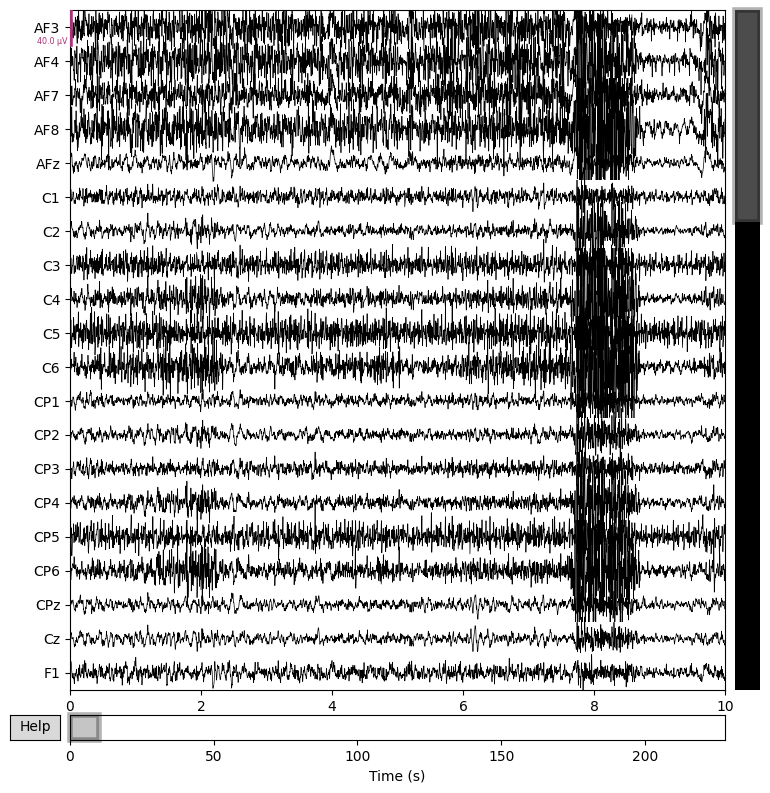

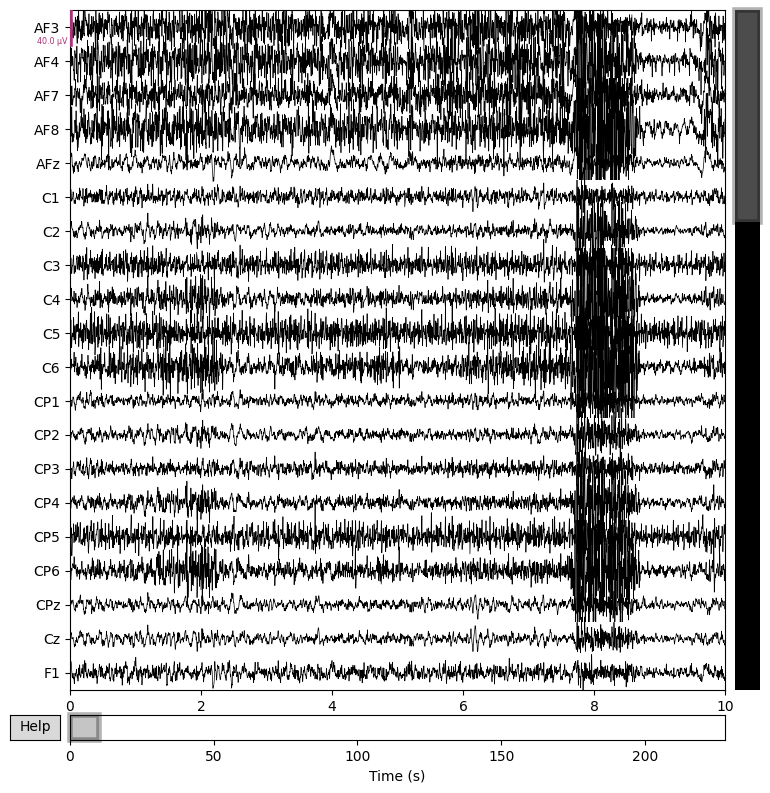

In [ ]:
raws_lft.plot(remove_dc=True)

In [ ]:
def plot_raw_optimized(raw, electrodes=None):
    fig, ax = plt.subplots(1, 1, figsize=(30, 15))
    fig.suptitle("Raw EEG Signal")
    fig.tight_layout()

    if electrodes is None:
        picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
    else:
        picks_eeg = mne.pick_channels(raw.info['ch_names'], include=electrodes)

    data, times = raw[picks_eeg, :]
    offset = 100 * np.arange(len(picks_eeg))
    ax.plot(times, data.T * 1e6 + offset)

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (uV)')
    ax.set_yticks(offset)
    ax.set_yticklabels(raw.info['ch_names'][i] for i in picks_eeg)
    
    plt.show()

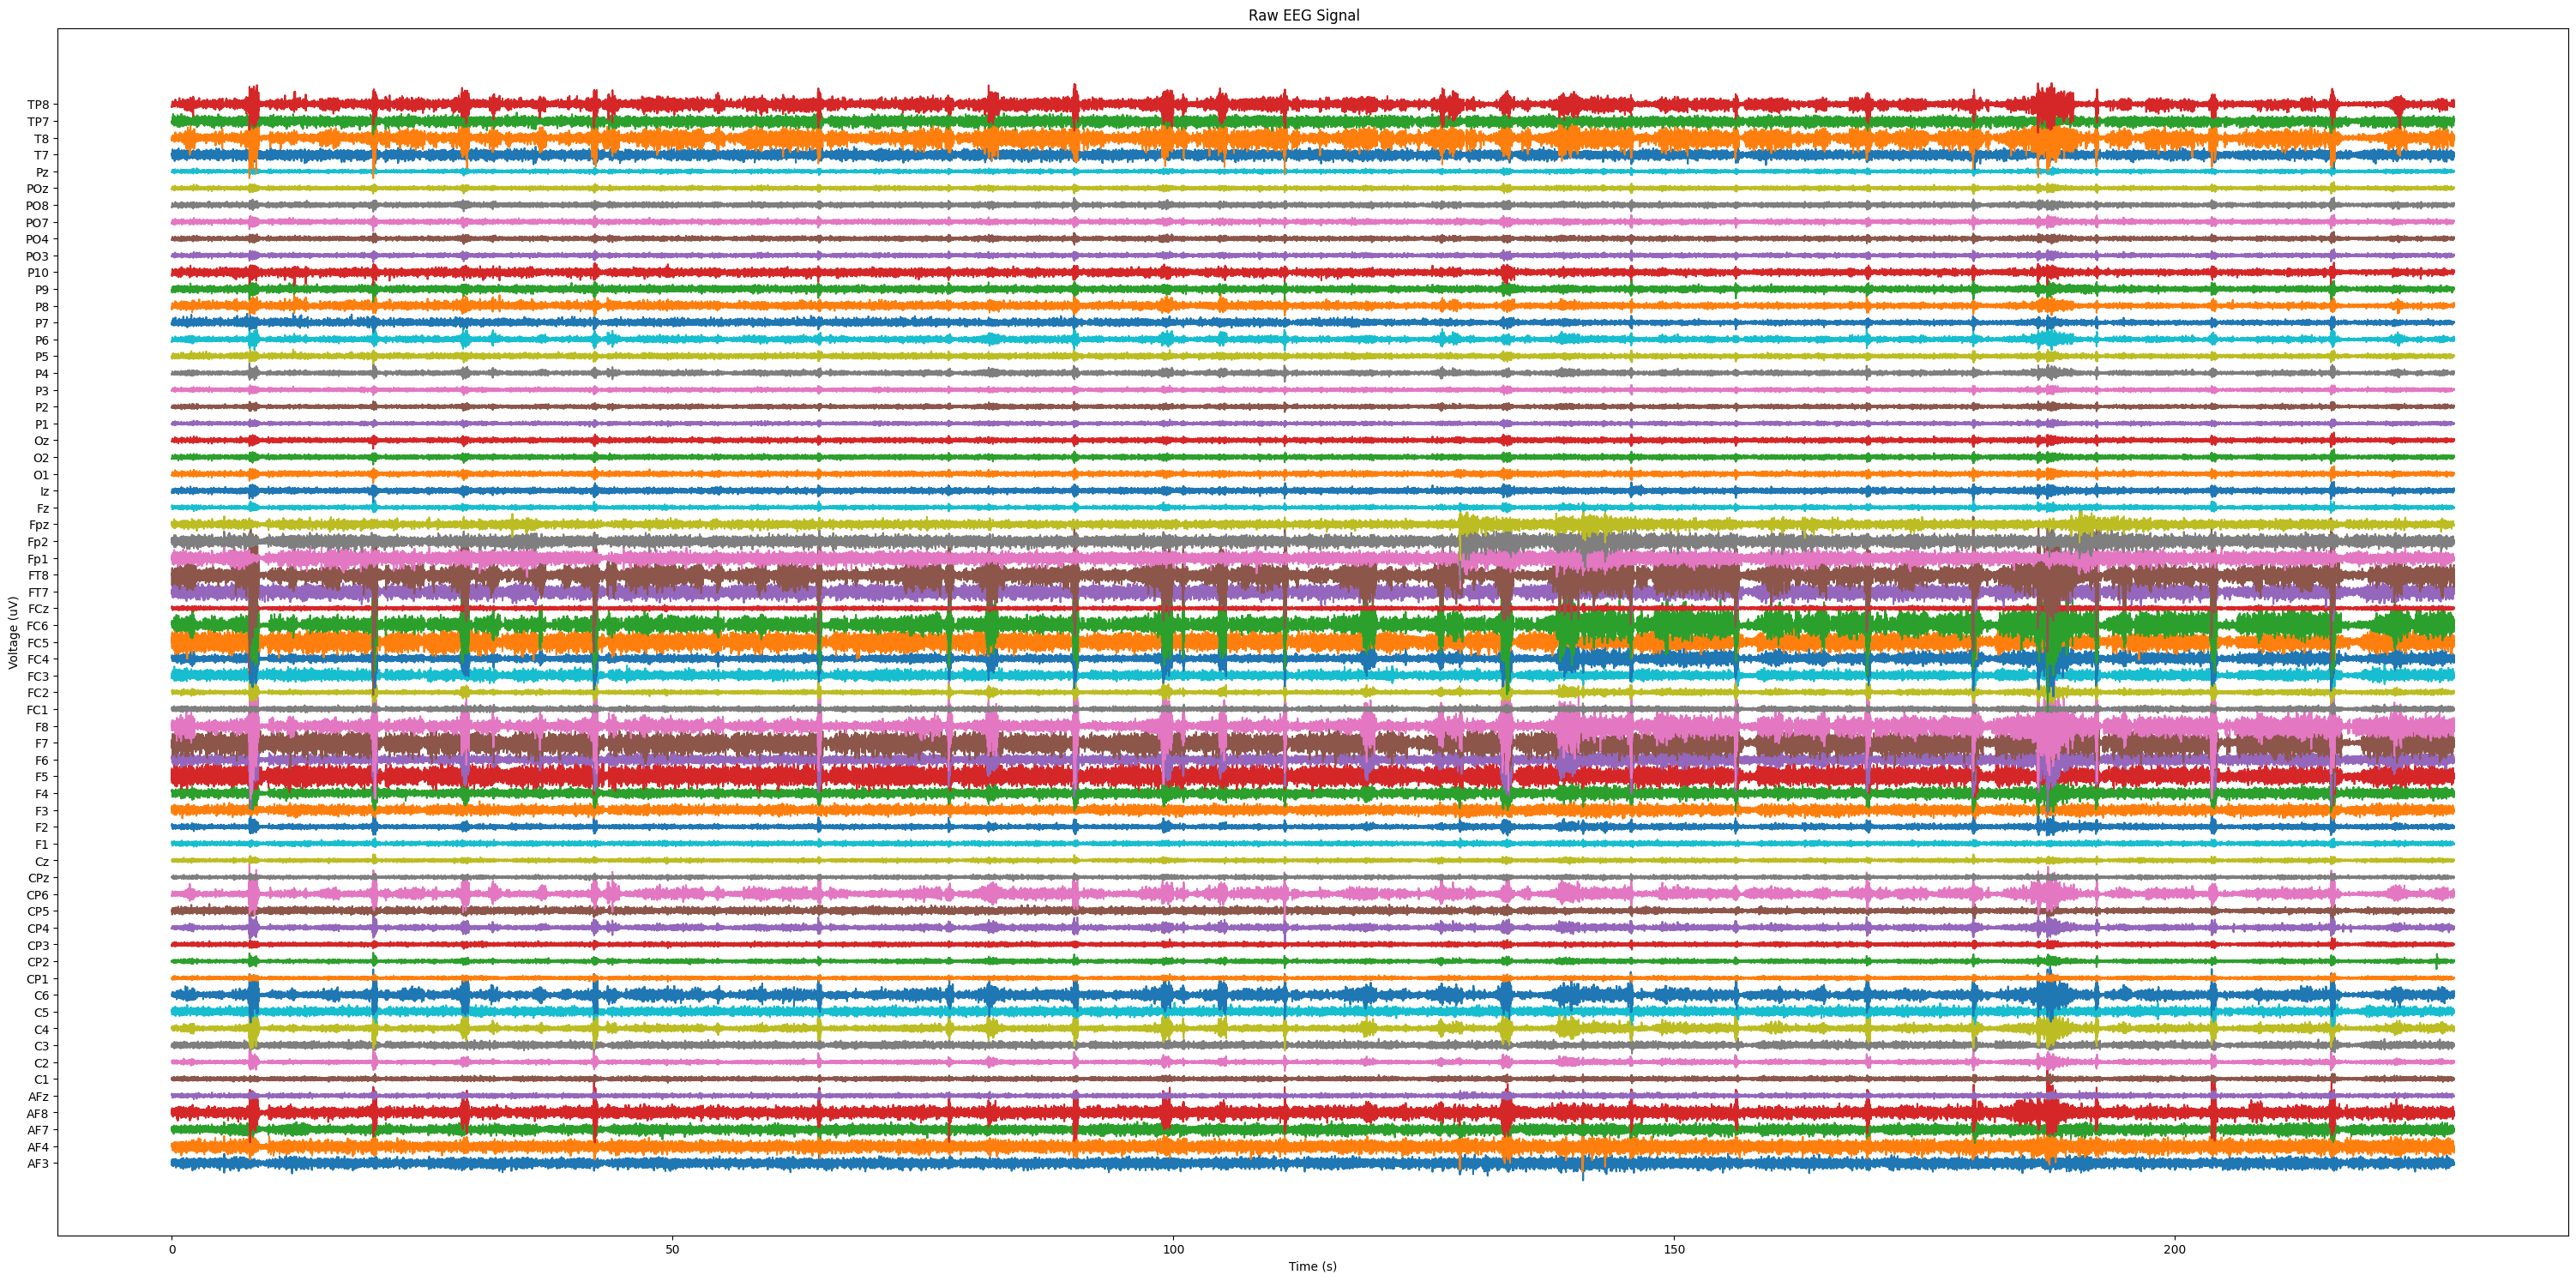

In [ ]:
plot_raw_optimized(raws_lft, electrodes=None)

In [ ]:
import matplotlib.pyplot as plt
import mne
import numpy as np

def plot_raw_subsampled(raw, electrodes=None, subsample_factor=1e6):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    fig.suptitle("Raw EEG Signal (Sous-échantillonné)")

    # Sélection des canaux
    if electrodes is None:
        picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
    else:
        picks_eeg = mne.pick_channels(raw.info['ch_names'], include=electrodes)
    
    # Extraction des données pour tous les temps et tous les canaux sélectionnés
    data, times = raw.get_data(picks=picks_eeg, return_times=True)
    
    # Sous-échantillonnage manuel des données et des temps
    data_subsampled = data[:, ::subsample_factor]
    times_subsampled = times[::subsample_factor]

    # Décalage pour une meilleure visualisation
    offset = 100 * np.arange(data_subsampled.shape[0])
    for i, data_channel in enumerate(data_subsampled):
        ax.plot(times_subsampled, (data_channel * 1e6) + offset[i], label=raw.info['ch_names'][picks_eeg[i]])

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (uV)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


C:\Users\julie\AppData\Local\Temp\ipykernel_24516\3154624662.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


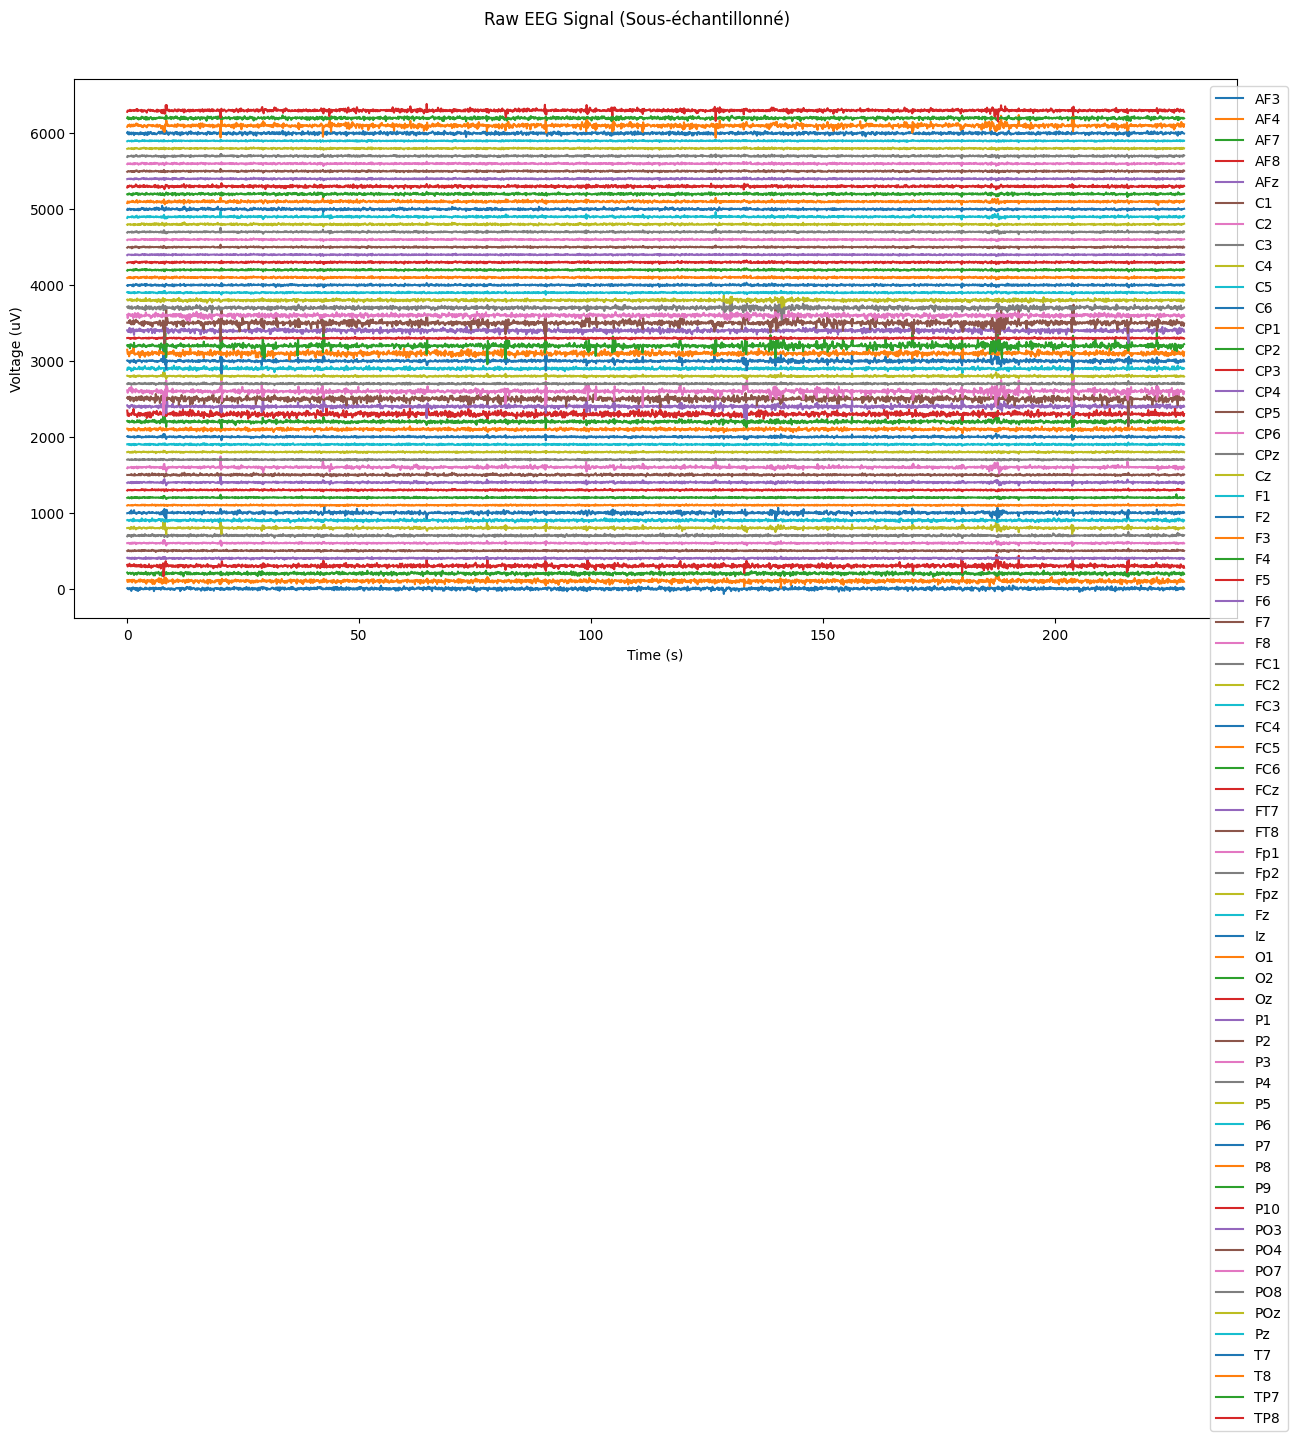

In [ ]:
plot_raw_subsampled(raws_lft, electrodes=None, subsample_factor=100)

In [ ]:
def plot_raw_optimized(raw, electrodes=None, subsample_factor=10000, figsize=(15, 15)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.suptitle("Raw EEG Signal")
    fig.tight_layout()
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    if electrodes is None:
        picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
    else:
        picks_eeg = mne.pick_channels(raw.info['ch_names'], include=electrodes)

    data, times = raw[picks_eeg, :]
    data = data[:, ::subsample_factor]
    times = times[::subsample_factor]
    offset = 100 * np.arange(len(picks_eeg))
    ax.plot(times, data.T * 1e6 + offset)

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (uV)')
    ax.set_yticks(offset)
    ax.set_yticklabels(raw.info['ch_names'][i] for i in picks_eeg)
    ax.set_xlim([times[0], times[-1]])
    ax.set_ylim([offset[0] -100, offset[-1] + 100])
    
    plt.show()

In [ ]:
plot_raw_optimized(raws_lft, electrodes=None, subsample_factor=200, figsize=(30, 15))

NameError: name 'raws_lft' is not defined

In [ ]:
a = zip([1, 2, 3], [4, 5, 6])
list(a)

[(1, 4), (2, 5), (3, 6)]

In [14]:
import matplotlib.pyplot as plt
import mne
import numpy as np

def get_channels(raws, side):
    endings = ('1', '3', '5', '7', '9') if side=='D' else ('2', '4', '6', '8', '10')
    channels_to_remove = [channel for channel in raws.ch_names if channel.endswith(endings)]
    channels = [channel for channel in raws.ch_names if channel not in channels_to_remove]
    channels_indices = [raws.ch_names.index(channel) for channel in channels]
    return channels_indices

def plot_raw_optimized(raw, side=None, electrodes=None, subsample_factor=200, figsize=(15, 15), name='raw_eeg_signal.png'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.suptitle("Raw EEG Signal")
    fig.tight_layout()
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    if electrodes is None:
        picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
    else:
        picks_eeg = mne.pick_channels(raw.info['ch_names'], include=electrodes)

    if side is not None:
        channels = get_channels(raw, side)
        picks_eeg = list(set(channels) & set(picks_eeg))

    data, times = raw[picks_eeg, :]
    data = data[:, ::subsample_factor]
    times = times[::subsample_factor]
    offset = 100 * np.arange(len(picks_eeg))
    ax.plot(times, data.T * 1e6 + offset)

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (uV)')
    ax.set_yticks(offset)
    ax.set_yticklabels(raw.info['ch_names'][i] for i in picks_eeg)
    ax.set_xlim([times[0], times[-1]])
    ax.set_ylim([offset[0] - 100, offset[-1] + 200])

    # Ajouter une échelle verticale pour les microvolts
    scale_length_uv = 100  # 100 uV pour l'échelle
    scale_x_position = times[-1] * 0.02  # Position horizontale de l'échelle à 98% du max de l'axe des temps
    scale_y_start = offset[-1] + 50  # Position de début verticale de l'échelle
    scale_y_end = scale_y_start + scale_length_uv  # Fin de l'échelle
    
    # Dessiner l'échelle verticale
    ax.plot([scale_x_position, scale_x_position], [scale_y_start, scale_y_end], color='k', lw=2)
    ax.text(scale_x_position +1, scale_y_start + scale_length_uv / 2, f'{scale_length_uv} uV', 
            ha='left', va='center', color='k')

    # sauvegarde des données
    plt.savefig(name)


In [17]:
# electrodes
raws_lft.info['ch_names'][:10]

['AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5']

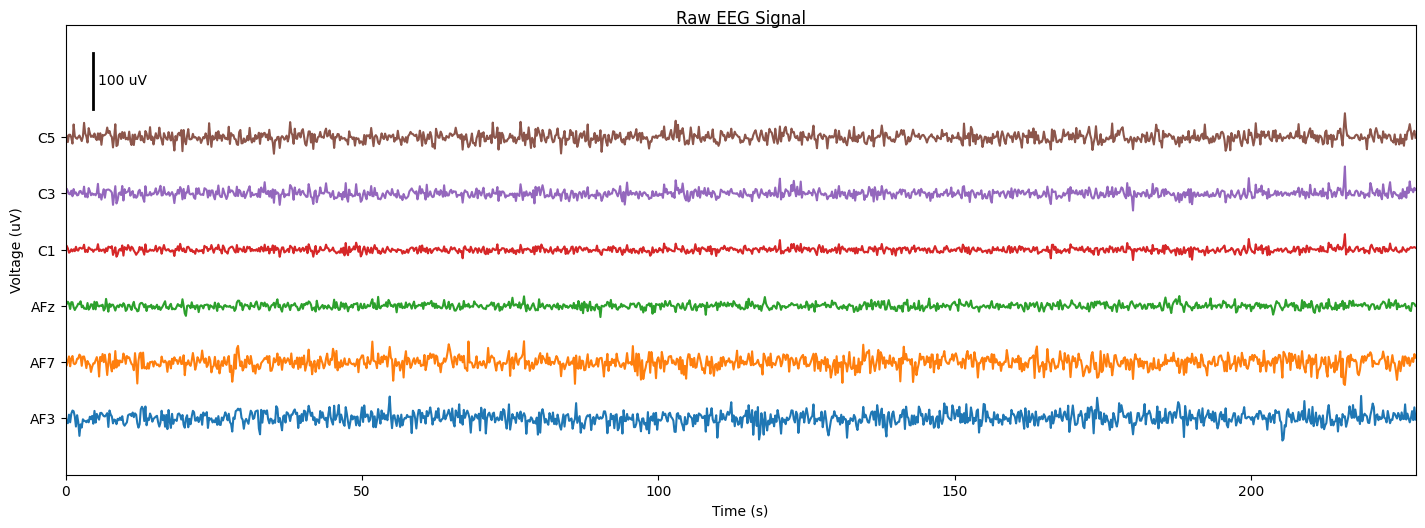

In [20]:
plot_raw_optimized(raws_lft, side='R', electrodes=raws_lft.info['ch_names'][:10], subsample_factor=200, figsize=(15, 5))